$\,\,Note:\,\,\Omega^{'}(\,\,in\,\,dynamo\,\,number\,\,P\,\,)=2\pi *10^{-9}$

In [3]:
import numpy as np
import cmath
import math
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm
import matplotlib as mpl



'--------------------------------------------------------------------------------------------'

def a(x):
    if x==0:
        return 0
    else:
        return x/(2*x+1)

def b(x):
    if x==0:
        return 0
    else:
        return (x+1)/(2*x+1)

def g(x):
    if x==0:
        return 0
    else:
        return x*(x+1)/(2*x+1)

def func_h(x):
    if x==0:
        return 0
    else:
        return x*(x+1)


'--------------------------------------------------------------------------------------------'


def alpha(x,a_profile):
    if a_profile == 'r_dependence':
        xa , xb , d = 0.675 , 0.725 , 0.05
        ans = ( 1 + math.erf( (x-xa) / d ) ) * ( 1 - math.erf( (x-xb) / d ) ) / 4
    elif a_profile == 'c':
        ans = 1
        
    return ans


'--------------------------------------------------------------------------------------------'


def Omega_1(x):
    ans = 1/2 * ( 1 + math.erf( ( x - 0.7 ) / 0.04 ) )
    return ans

def d_Omega_r(x):
    ans = 50 * math.pi**(0.5) * math.exp( - ( ( x - 0.7 ) / 0.04 )**2 )
    return ans


'--------------------------------------------------------------------------------------------'


def An(x):
    ans = a(x)*a(x+1)
    return ans

def Bn(x):
    ans = a(x)*b(x+1) + b(x)*a(x-1)
    return ans

def Cn(x):
    ans = b(x)*b(x-1)
    return ans


'--------------------------------------------------------------------------------------------'
'角速度径向求导项'



def an_3_2(x):
    ans = An(x-2)
    return ans

def an_1_2(x):
    ans = Bn(x)-An(x-2)
    return ans

def an1_2(x):
    ans = Cn(x+2) - Bn(x)
    return ans

def an3_2(x):
    ans = -Cn(x+2)
    return ans



def an_5_4(x):
    ans = An(x-4)*An(x-2)
    return ans

def an_3_4(x):
    ans = An(x-2)*Bn(x) + An(x-2)*Bn(x-2) - An(x-4)*An(x-1)
    return ans

def an_1_4(x):
    ans= An(x)*Cn(x+2) + Bn(x)**2 + An(x-2)*Cn(x) - An(x-2)*Bn(x) - An(x-2)*Bn(x-2)
    return ans

def an1_4(x):
    ans = Bn(x+2)*Cn(x+2) + Bn(x)*Cn(x+2) - An(x)*Cn(x+2) - Bn(x)**2 - An(x-2)*Cn(x)
    return ans

def an3_4(x):
    ans = Cn(x+4)*Cn(x+2) - Bn(x+2)*Cn(x+2) - Bn(x)*Cn(x+2)
    return ans

def an5_4(x):
    ans = Cn(x+4)*Cn(x+2)
    return ans



def an_5(x):
    ans = -67.87 * an_5_4(x)
    return ans

def an_3(x):
    ans = -1 * ( 67.87*an_3_4(x) + 62.79*an_3_2(x) )
    return ans

def an_1(x):
    ans = ( 37.508*g(x-1) - 67.87*an_1_4(x) - 62.79*an_1_2(x) )
    return ans

def an1(x):
    ans = -( 37.508*g(x+1) + 67.87*an1_4(x) + 62.79*an1_2(x) )
    return ans

def an3(x):
    ans = -1 * ( 67.87*an3_4(x) + 62.79*an3_2(x) )
    return ans

def an5(x):
    ans = -67.87 * an5_4(x)
    return ans



'--------------------------------------------------------------------------------------------'
'角速度纬向求导项'

def an_5_j(x):
    ans = -67.87 * 4  * An(x-5) * An(x-3) * a(x-1)
    return ans

def an_3_j(x):
    ans = 145.9 * An(x-3) * a(x-1) \
        - 67.87 * 4  * ( An(x-3)*An(x-1)*b(x+1) + ( An(x-3)*Bn(x-1) + Bn(x-3)*An(x-3) )*a(x-1) )
    return ans

def an_1_j(x):
    ans = 62.79 * 2 * a(x-1) \
        + 145.9 * ( An(x-1) * b(x+1) + Bn(x-1) * a(x-1) ) \
        - 67.87 * 4 * ( ( An(x-1)*Bn(x+1) + Bn(x-1)*An(x-1) )*b(x+1) \
                        + ( An(x-1)*Cn(x+1) + Bn(x-1)**2 + Cn(x-1)*An(x-3) )*a(x-1) )
    return ans

def an1_j(x):
    ans = 62.79 * 2 * b(x+1) \
        + 145.9 * ( Bn(x+1) * b(x+1) + Cn(x+1) * a(x-1) ) \
        - 67.87 * 4 * ( ( An(x+1)*Cn(x+3) + Bn(x+1)*Bn(x+1) + Cn(x+1)*An(x-1) )*b(x+1) \
                        + ( Bn(x+1)*Cn(x+1) + Cn(x+1)*Bn(x-1) )*a(x-1) )
    return ans

def an3_j(x):
    ans = 145.9 * Cn(x+3) * b(x+1) \
        - 67.87 * 4 * ( ( Bn(x+3)*Cn(x+3) + Cn(x+3)*Bn(x+1) )*b(x+1) + Cn(x+3)*Cn(x+1)*a(x-1) )
    return ans

def an5_j(x):
    ans = -67.87 * 4  * Cn(x+5) * Cn(x+3) * b(x+1)
    return ans



'--------------------------------------------------------------------------------------------'
def eta(x):
    ans = 2.2*10**4 + 1/2*2*10**7*( 1+ math.erf( (x-0.7)/0.03)) + \
        1/2*2.5*10**8*( 1+ math.erf( (x-0.9)/0.05))
    
    # ans = 2.2*10**4 + 1/2*2*10**7*( 1+ math.erf( (x-0.9)/0.03)) + \
    # 1/2*2.5*10**8*( 1+ math.erf( (x-0.65)/0.05))
    return ans/10**8
    # return 1

def eta_r(x):
    ans = 2*10**7/math.pi**0.5/0.03*math.exp( -((x-0.7)/0.03)**2 ) + \
        2.5*10**8/math.pi**0.5/0.05*math.exp( -((x-0.9)/0.05)**2 )
    return ans/10**8


## Case1: $\,\,\,\frac{d\Omega}{dr}=\Omega^{'}$ & $\frac{d\Omega}{d\theta}=0$

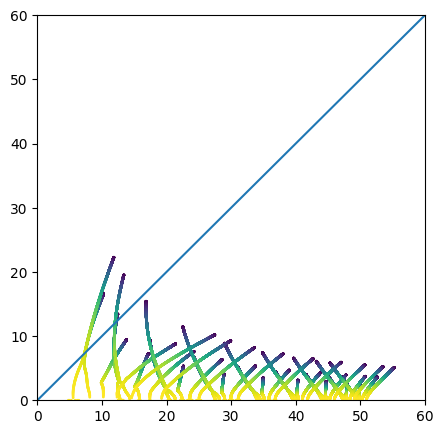

In [4]:
def generate(P,M,n,a_profile='r_dependence'):
    x0,xo=0.6,1
    h=(xo-x0)/M
    h_2d=1/h**2
    h_d=1/h
    dim=(M-1)*n
    matrix = np.zeros((dim, dim))
    a_profile=a_profile
    for i in range(0,n):
        row_n=i*(M-1)
        
        
        for j in range(0,M-1):
            row=row_n+j
            col=row
            xj=x0+(j+1)*h

            if i%2 ==0:
                if j == 0:
                    matrix[row][col] = -1*( 2*h_2d + func_h( i+1 )/xj**2 )
                    matrix[row][col+1] = h_2d + 2*h_d/xj
                elif j == M-2:
                    matrix[row][col-1] = h_2d - 2*h_d/xj
                    matrix[row][col] = -1*( 2*h_2d + func_h( i+1 )/xj**2 - ( h_2d + 2*h_d/xj )/( 1 + h*func_h(i+1) ) )
                else:
                    matrix[row][col-1] = h_2d - 2*h_d/xj
                    matrix[row][col] = -1*( 2*h_2d + func_h( i+1 )/xj**2 )
                    matrix[row][col+1] = h_2d + 2*h_d/xj
                
                col_next=row+(M-1)
                col_before=row-(M-1)
                if i == 0:
                    matrix[row][col_next] = alpha(xj,a_profile) * b(i+2)
                elif i == n-1:
                    matrix[row][col_before] = alpha(xj,a_profile) * a(i)
                else:
                    matrix[row][col_next] = alpha(xj,a_profile) * b(i+2)
                    matrix[row][col_before] = alpha(xj,a_profile) * a(i)
                

            if i%2 ==1:
                if j == 0:
                    matrix[row][col] = ( (h_2d-2*h_d/xj)/(1-h**2/xj) -1*( 2*h_2d + func_h( i+1 )/xj**2 ) )
                    matrix[row][col+1] = h_2d + 2*h_d/xj
                elif j == M-2:
                    matrix[row][col-1] = h_2d - 2*h_d/xj
                    matrix[row][col] = -1*( 2*h_2d + func_h( i+1 )/xj**2 )
                else:
                    matrix[row][col-1] = h_2d - 2*h_d/xj
                    matrix[row][col] = -1*( 2*h_2d + func_h( i+1 )/xj**2 )
                    matrix[row][col+1] = h_2d + 2*h_d/xj
            
                col_next=row+(M-1)
                col_before=row-(M-1)
                if i == n-1:
                    matrix[row][col_before]=P*g(i)
                else:
                    matrix[row][col_next]=-1*P*g(i+2)
                    matrix[row][col_before]=P*g(i)

    return matrix


def get_eigvals(P,M,n,s='dont show',a_cfg='r_dependence'):
    matrix=generate(P,M,n,a_cfg)
    # print(matrix)

    eigvals = [(-i,cmath.sqrt(-i).real,cmath.sqrt(-i).imag) for i in np.linalg.eigvals(matrix)]

    reL=[]
    imL=[]
    for j in eigvals:
        if j[1] >= 0 and j[2] >=0:
            reL.append(j[1])
            imL.append(j[2])
        # if j[1] < j[2]:
        #     print('yes')
    
    if s == 'show':
        print(P)
        print(*list(zip(reL,imL)),sep='\n')
        print('-'*100)

    return reL,imL

def draw(ax,x,y,i,P):
    if i=='n':
        # ax.scatter(x,y,s=10,marker='x')
        ax.scatter(x,y,s=1,c=[cmap(norm(P)) for i in range(len(x))])
    else:
        Color=cm.Accent(i)
        ax.scatter(x,y,'x',color=Color,s=10)





# P=1
# M=4
# n=4
# ans = generate(P,M,n)
# np.set_printoptions(threshold=np.inf)
# for i in ans:
#     L=[ float(j) for j in list(i)] 
#     print(L)


# s='show'
s='dont show'
fig,ax=plt.subplots(figsize=(5,5),dpi=100)
cmap = plt.cm.viridis
mini=-200000
maxi=0
M=10
n=10
a_cfg='c'
# a_cfg='r_dependence'
for P in range(mini,maxi,100):
    norm = Normalize(vmin=mini, vmax=maxi)
    x,y = get_eigvals(P,M,n,s,a_cfg)
    # print(x,y)
    draw(ax,x,y,'n',P)

ax.set_xlim(0,60)
ax.set_ylim(0,60)
ax.plot([0,100],[0,100])
plt.show()


## Case2: $\,\,\,\,\Omega(r,\theta)$

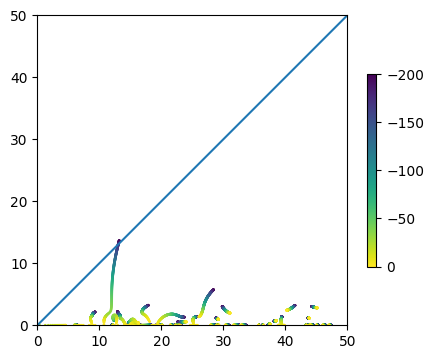

In [5]:
def generate(P,M,n,a_profile='r_dependence'):
    x0,xo=0.6,1
    h=(xo-x0)/M
    h_2d=1/h**2
    h_d=1/h
    dim=(M-1)*n
    matrix = np.zeros((dim, dim))
    a_profile=a_profile
    for i in range(0,n):
        row_n=i*(M-1)
        
        
        for j in range(0,M-1):
            row=row_n+j
            col=row
            xj=x0+(j+1)*h

            if i%2 ==0:
                if j == 0:
                    matrix[row][col] = -1*( 2*h_2d + func_h( i+1 )/xj**2 )
                    matrix[row][col+1] = h_2d + 2*h_d/xj
                elif j == M-2:
                    matrix[row][col-1] = h_2d - 2*h_d/xj
                    matrix[row][col] = -1*( 2*h_2d + func_h( i+1 )/xj**2 - ( h_2d + 2*h_d/xj )/( 1 + h*func_h(i+1) ) )
                else:
                    matrix[row][col-1] = h_2d - 2*h_d/xj
                    matrix[row][col] = -1*( 2*h_2d + func_h( i+1 )/xj**2 )
                    matrix[row][col+1] = h_2d + 2*h_d/xj
                
                col_next=row+(M-1)
                col_before=row-(M-1)
                if i == 0:
                    matrix[row][col_next] = alpha(xj,a_profile) * b(i+2)
                elif i == n-1:
                    matrix[row][col_before] = alpha(xj,a_profile) * a(i)
                else:
                    matrix[row][col_next] = alpha(xj,a_profile) * b(i+2)
                    matrix[row][col_before] = alpha(xj,a_profile) * a(i)
                

            if i%2 ==1:
                if j == 0:
                    matrix[row][col] = ( (h_2d-2*h_d/xj)/(1-h**2/xj) -1*( 2*h_2d + func_h( i+1 )/xj**2 ) )
                    matrix[row][col+1] = h_2d + 2*h_d/xj
                elif j == M-2:
                    matrix[row][col-1] = h_2d - 2*h_d/xj
                    matrix[row][col] = -1*( 2*h_2d + func_h( i+1 )/xj**2 )
                else:
                    matrix[row][col-1] = h_2d - 2*h_d/xj
                    matrix[row][col] = -1*( 2*h_2d + func_h( i+1 )/xj**2 )
                    matrix[row][col+1] = h_2d + 2*h_d/xj
            



                '----------------角速度径向求导项----------------'
                col_n1=row+(M-1)
                col_n_1=row-(M-1)
                if i == n-1:
                    matrix[row][col_n_1] = P * d_Omega_r(xj) * an_1(i+1)
                else:
                    matrix[row][col_n1] = P * d_Omega_r(xj) * an1(i+1)
                    matrix[row][col_n_1] = P * d_Omega_r(xj) * an_1(i+1)
                
                if i>=3:
                    col_n_3 = row-3 * (M-1)
                    matrix[row][col_n_3] = P * d_Omega_r(xj) * an_3(i+1)
                if i<=n-4:
                    col_n3 = row+3 * (M-1)
                    matrix[row][col_n3] = P * d_Omega_r(xj) * an3(i+1)

                if i>=5:
                    col_n_5 = row-5 * (M-1)
                    matrix[row][col_n_5] = P * d_Omega_r(xj) * an_5(i+1)
                if i<=n-6:
                    col_n5 = row+5 * (M-1)
                    matrix[row][col_n5] = P * d_Omega_r(xj) * an5(i+1)


                if xj>0.95:
                    if i == n-1:
                        matrix[row][col_n_1] -= 16.808 * 20 * P * Omega_1(xj) * g(i)
                    else:
                        matrix[row][col_n1] -= 16.808 * 20 * P * Omega_1(xj) * g(i+2)
                        matrix[row][col_n_1] -= 16.808 * 20 * P * Omega_1(xj) * g(i)
                        


                '----------------角速度纬向求导项----------------'
                col_n1=row+(M-1)
                col_n_1=row-(M-1)
                xj_1=xj-h
                xj1=xj+h
                if i == n-1:
                    matrix[row][col_n_1 - 1] = 1/xj_1/2*h_d*an_1_j(i+1)
                    matrix[row][col_n_1 + 1] = -1/xj1/2*h_d*an_1_j(i+1)
                else:
                    matrix[row][col_n1 - 1] = 1/xj_1/2*h_d*an1_j(i+1)
                    matrix[row][col_n1 + 1] = -1/xj1/2*h_d*an1_j(i+1)
                    matrix[row][col_n_1 - 1] = 1/xj_1/2*h_d*an_1_j(i+1)
                    matrix[row][col_n_1 + 1] = -1/xj1/2*h_d*an_1_j(i+1)
                
                if i>=3:
                    col_n_3 = row-3 * (M-1)
                    matrix[row][col_n_3 - 1] = 1/xj_1/2*h_d*an_3_j(i+1)
                    matrix[row][col_n_3 + 1] = -1/xj1/2*h_d*an_3_j(i+1)
                if i<=n-4:
                    col_n3 = row+3 * (M-1)
                    matrix[row][col_n3 - 1] = 1/xj_1/2*h_d*an3_j(i+1)
                    matrix[row][col_n3 + 1] = -1/xj1/2*h_d*an3_j(i+1)

                if i>=5:
                    col_n_5 = row-5 * (M-1)
                    matrix[row][col_n_5 - 1] = 1/xj_1/2*h_d*an_5_j(i+1)
                    matrix[row][col_n_5 + 1] = -1/xj1/2*h_d*an_5_j(i+1)
                if i<=n-6:
                    col_n5 = row+5 * (M-1)
                    matrix[row][col_n5 - 1] = 1/xj_1/2*h_d*an5_j(i+1)
                    matrix[row][col_n5 + 1] = -1/xj1/2*h_d*an5_j(i+1)

    return matrix


def get_eigvals(P,M,n,s='dont show',a_cfg='r_dependence'):
    matrix=generate(P,M,n,a_cfg)
    # print(matrix)

    eigvals = [(-i,cmath.sqrt(-i).real,cmath.sqrt(-i).imag) for i in np.linalg.eigvals(matrix)]

    reL=[]
    imL=[]
    for j in eigvals:
        if j[1] >= 0 and j[2] >=0:
            reL.append(j[1])
            imL.append(j[2])
        # if j[1] < j[2]:
        #     print('yes')
    
    if s == 'show':
        print(P)
        print(*list(zip(reL,imL)),sep='\n')
        print('-'*100)

    return reL , imL , matrix

def draw(ax,x,y,i,P):
    if i=='n':
        # ax.scatter(x,y,s=10,marker='x')
        ax.scatter(x,y,s=1,c=[cmap(norm(P)) for i in range(len(x))])
    else:
        Color=cm.Accent(i)
        ax.scatter(x,y,'x',color=Color,s=10)





# P=1
# M=4
# n=4
# ans = generate(P,M,n)
# np.set_printoptions(threshold=np.inf)
# for i in ans:
#     L=[ float(j) for j in list(i)] 
#     print(L)


# s='show'
s='dont show'
fig,ax=plt.subplots(figsize=(5,5),dpi=100)
cmap = plt.cm.viridis
mini=-200
maxi=0
M=30
n=10
# a_cfg='c'
a_cfg='r_dependence'
for P in range(mini,maxi,1):
    norm = Normalize(vmin=mini, vmax=maxi)
    x , y , Matrix= get_eigvals(P,M,n,s,a_cfg)
    # print(x,y)
    draw(ax,x,y,'n',P)

cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=mini, vmax=maxi)
im = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
cb=fig.colorbar( im , ax=ax , shrink=0.5 )
cb.ax.invert_yaxis()
lim=5
ax.set_xlim(0,lim*10)
ax.set_ylim(0,lim*10)
ax.plot([0,100],[0,100])
ax.set_aspect(1)
plt.show()


## Case3: $\,\,\,\,\,\eta(r)$

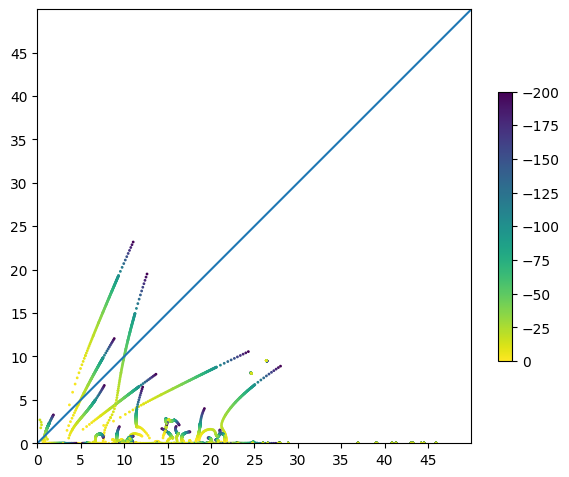

In [6]:
def generate(P,M,n,a_profile='r_dependence'):
    x0,xo=0.6,1
    h=(xo-x0)/M
    h_2d=1/h**2
    h_d=1/h
    dim=(M-1)*n
    matrix = np.zeros((dim, dim))
    a_profile=a_profile
    for i in range(0,n):
        row_n=i*(M-1)
        
        
        for j in range(0,M-1):
            row=row_n+j
            col=row
            xj=x0+(j+1)*h

            if i%2 ==0:
                if j == 0:
                    matrix[row][col] = -1*( 2*h_2d + func_h( i+1 )/xj**2 )*eta(xj)
                    matrix[row][col+1] = (h_2d + 2*h_d/xj)*eta(xj)
                elif j == M-2:
                    matrix[row][col-1] = (h_2d - 2*h_d/xj)*eta(xj)
                    matrix[row][col] = -1*( 2*h_2d + func_h( i+1 )/xj**2 - ( h_2d + 2*h_d/xj )/( 1 + h*func_h(i+1) ) )*eta(xj)
                else:
                    matrix[row][col-1] = (h_2d - 2*h_d/xj)*eta(xj)
                    matrix[row][col] = -1*( 2*h_2d + func_h( i+1 )/xj**2 )*eta(xj)
                    matrix[row][col+1] = (h_2d + 2*h_d/xj)*eta(xj)
                
                col_next=row+(M-1)
                col_before=row-(M-1)
                if i == 0:
                    matrix[row][col_next] = alpha(xj,a_profile) * b(i+2)
                elif i == n-1:
                    matrix[row][col_before] = alpha(xj,a_profile) * a(i)
                else:
                    matrix[row][col_next] = alpha(xj,a_profile) * b(i+2)
                    matrix[row][col_before] = alpha(xj,a_profile) * a(i)
                

            if i%2 ==1:
                if j == 0:
                    matrix[row][col] = ( (h_2d-2*h_d/xj)/(1-h**2/xj) -1*( 2*h_2d + func_h( i+1 )/xj**2 ) )*eta(xj)
                    matrix[row][col+1] = (h_2d + 2*h_d/xj)*eta(xj)
                elif j == M-2:
                    matrix[row][col-1] = (h_2d - 2*h_d/xj)*eta(xj)
                    matrix[row][col] = -1*( 2*h_2d + func_h( i+1 )/xj**2 )*eta(xj)
                else:
                    matrix[row][col-1] = (h_2d - 2*h_d/xj)*eta(xj)
                    matrix[row][col] = -1*( 2*h_2d + func_h( i+1 )/xj**2 )*eta(xj)
                    matrix[row][col+1] = (h_2d + 2*h_d/xj)*eta(xj)

                '-----------------磁扩散率求导项-----------------'
                xj_1=xj-h
                xj1=xj+h
                if j == 0:
                    matrix[row][col+1] += 1/xj/2*h_d*xj1*eta_r(xj)
                elif j == M-2:
                    matrix[row][col-1] -= 1/xj/2*h_d*xj_1*eta_r(xj)
                else:
                    matrix[row][col-1] -= 1/xj/2*h_d*xj_1*eta_r(xj)
                    matrix[row][col+1] += 1/xj/2*h_d*xj1*eta_r(xj)

                '----------------角速度径向求导项----------------'
                col_n1=row+(M-1)
                col_n_1=row-(M-1)
                if i == n-1:
                    matrix[row][col_n_1] = P * d_Omega_r(xj) * an_1(i+1)
                else:
                    matrix[row][col_n1] = P * d_Omega_r(xj) * an1(i+1)
                    matrix[row][col_n_1] = P * d_Omega_r(xj) * an_1(i+1)
                
                if i>=3:
                    col_n_3 = row-3 * (M-1)
                    matrix[row][col_n_3] = P * d_Omega_r(xj) * an_3(i+1)
                if i<=n-4:
                    col_n3 = row+3 * (M-1)
                    matrix[row][col_n3] = P * d_Omega_r(xj) * an3(i+1)

                if i>=5:
                    col_n_5 = row-5 * (M-1)
                    matrix[row][col_n_5] = P * d_Omega_r(xj) * an_5(i+1)
                if i<=n-6:
                    col_n5 = row+5 * (M-1)
                    matrix[row][col_n5] = P * d_Omega_r(xj) * an5(i+1)


                if xj>0.95:
                    if i == n-1:
                        matrix[row][col_n_1] -= 16.808 * 20 * P * Omega_1(xj) * g(i)
                    else:
                        matrix[row][col_n1] += 16.808 * 20 * P * Omega_1(xj) * g(i+2)
                        matrix[row][col_n_1] -= 16.808 * 20 * P * Omega_1(xj) * g(i)
                        


                '----------------角速度纬向求导项----------------'
                col_n1=row+(M-1)
                col_n_1=row-(M-1)
                xj_1=xj-h
                xj1=xj+h
                if i == n-1:
                    matrix[row][col_n_1 - 1] = 1/xj_1/2*h_d*an_1_j(i+1)
                    matrix[row][col_n_1 + 1] = -1/xj1/2*h_d*an_1_j(i+1)
                else:
                    matrix[row][col_n1 - 1] = 1/xj_1/2*h_d*an1_j(i+1)
                    matrix[row][col_n1 + 1] = -1/xj1/2*h_d*an1_j(i+1)
                    matrix[row][col_n_1 - 1] = 1/xj_1/2*h_d*an_1_j(i+1)
                    matrix[row][col_n_1 + 1] = -1/xj1/2*h_d*an_1_j(i+1)
                
                if i>=3:
                    col_n_3 = row-3 * (M-1)
                    matrix[row][col_n_3 - 1] = 1/xj_1/2*h_d*an_3_j(i+1)
                    matrix[row][col_n_3 + 1] = -1/xj1/2*h_d*an_3_j(i+1)
                if i<=n-4:
                    col_n3 = row+3 * (M-1)
                    matrix[row][col_n3 - 1] = 1/xj_1/2*h_d*an3_j(i+1)
                    matrix[row][col_n3 + 1] = -1/xj1/2*h_d*an3_j(i+1)

                if i>=5:
                    col_n_5 = row-5 * (M-1)
                    matrix[row][col_n_5 - 1] = 1/xj_1/2*h_d*an_5_j(i+1)
                    matrix[row][col_n_5 + 1] = -1/xj1/2*h_d*an_5_j(i+1)
                if i<=n-6:
                    col_n5 = row+5 * (M-1)
                    matrix[row][col_n5 - 1] = 1/xj_1/2*h_d*an5_j(i+1)
                    matrix[row][col_n5 + 1] = -1/xj1/2*h_d*an5_j(i+1)


    return matrix


def get_eigvals(P,M,n,s='dont show',a_cfg='r_dependence'):
    matrix=generate(P,M,n,a_cfg)
    # print(matrix)

    eigvals = [(-i,cmath.sqrt(-i).real,cmath.sqrt(-i).imag) for i in np.linalg.eigvals(matrix)]

    reL=[]
    imL=[]
    for j in eigvals:
        if j[1] >= 0 and j[2] >=0:
            reL.append(j[1])
            imL.append(j[2])
        # if j[1] < j[2]:
        #     print('yes')
    
    if s == 'show':
        print(P)
        print(*list(zip(reL,imL)),sep='\n')
        print('-'*100)

    return reL , imL , matrix

def draw(ax,x,y,i,P):
    if i=='n':
        # ax.scatter(x,y,s=10,marker='x')
        ax.scatter(x,y,s=1,c=[cmap(norm(P)) for i in range(len(x))])
    else:
        Color=cm.Accent(i)
        ax.scatter(x,y,'x',color=Color,s=10)





# P=1
# M=4
# n=4
# ans = generate(P,M,n)
# np.set_printoptions(threshold=np.inf)
# for i in ans:
#     L=[ float(j) for j in list(i)] 
#     print(L)


# s='show'
s='dont show'
fig,ax=plt.subplots(figsize=(7,7),dpi=100)
cmap = plt.cm.viridis
mini=-200
maxi1=-100
maxi=0
M=10
n=10
# a_cfg='c'
a_cfg='r_dependence'
PL = [i for i in range(maxi1,maxi,1)]+[i for i in range(mini,maxi,10)]
for P in PL:
    norm = Normalize(vmin=mini, vmax=maxi)
    x , y , Matrix= get_eigvals(P,M,n,s,a_cfg)
    # print(x,y)
    draw(ax,x,y,'n',P)

cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=mini, vmax=maxi)
im = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
cb=fig.colorbar( im , ax=ax , shrink=0.5 )
cb.ax.invert_yaxis()
lim=5
ax.set_xlim(0,lim*10)
ax.set_ylim(0,lim*10)
ax.set_xticks([i for i in range(0,50,5)])
ax.set_yticks([i for i in range(0,50,5)])
ax.plot([0,100],[0,100])
ax.set_aspect(1)
plt.show()


In [7]:
def get_alpha_eta(P,k):
    import math
    R=6.955*10**8
    pi = math.pi
    alpha = 10**9 * pi * R * P / 22**2 / (365*24*3600)**2 / 2 / k**4
    eta = pi * R**2 / k**2 / (22*365*24*3600)
    return alpha , eta/10**7

ans = get_alpha_eta(400,6)
print(ans)

(0.700508526186634, 6.084324279517565)
